In [28]:
import numpy as np
import matplotlib.pyplot as plt

from py.params import setParams
from py.analysis import computeFPs, checkFixPtsStability, a_jkValues
from py.analysis import tr, det, lmbd

from py.kernels import gaussian, exponential



# This will reload all imports as soon as the code changes
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [153]:
params={'I_e': 2.75, 'I_i': 2.1, 'n': 350, 'length': 10, 'end_t': 2000, 'sigma_e': 0.8, 'sigma_i': 2} 
ps = setParams(params)

In [154]:
fps = computeFPs(ps)

In [155]:
fps

array([[0.12857188, 0.14339961]])

In [156]:
stab = checkFixPtsStability(fps, ps)

In [157]:
stab

[1]

In [159]:
a_ee, a_ei, a_ie, a_ii = a_jkValues(fps[0], ps)

In [160]:
l=61
k = np.linspace(-2,2,l)
determinant = det(k, a_ee, a_ei, a_ie, a_ii, ps)
trace = tr(k, a_ee, a_ii, ps)
zero = np.zeros(l)

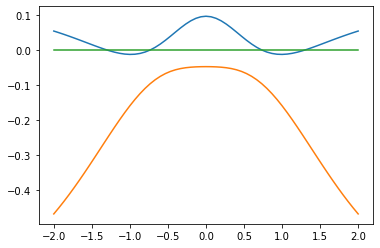

In [161]:
plt.plot(k, determinant, k, trace)
plt.plot(k, zero)

In [10]:
lmbda = lmbd(k, a_ee, a_ei, a_ie, a_ii, ps)

Using fourier transformation of gaussian: f_gaussian
Using fourier transformation of gaussian: f_gaussian
Using fourier transformation of gaussian: f_gaussian
Using fourier transformation of gaussian: f_gaussian
Using fourier transformation of gaussian: f_gaussian
Using fourier transformation of gaussian: f_gaussian
Using fourier transformation of gaussian: f_gaussian
Using fourier transformation of gaussian: f_gaussian
Using fourier transformation of gaussian: f_gaussian
Using fourier transformation of gaussian: f_gaussian
Using fourier transformation of gaussian: f_gaussian
Using fourier transformation of gaussian: f_gaussian
Using fourier transformation of gaussian: f_gaussian
Using fourier transformation of gaussian: f_gaussian
Using fourier transformation of gaussian: f_gaussian
Using fourier transformation of gaussian: f_gaussian


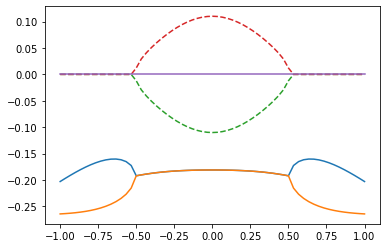

In [11]:
plt.plot(k, lmbda[0].real, k, lmbda[1].real)
plt.plot(k, lmbda[0].imag, k, lmbda[1].imag, linestyle='dashed')
plt.plot(k, zero)

In [105]:
trace2 = lmbda[0]+lmbda[1]
determinant2 = lmbda[0]*lmbda[1]

/Users/ronja/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


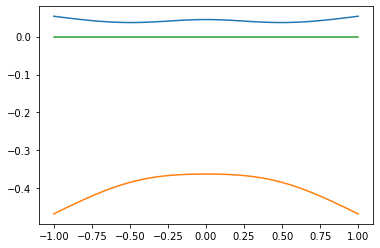

In [106]:
plt.plot(k, determinant2, k, trace2)
plt.plot(k, zero)

In [25]:
kernel = gaussian(10, ps.x)*ps.dx

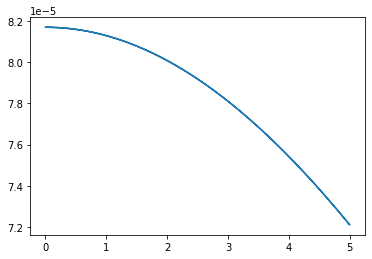

In [26]:
plt.plot(ps.x, kernel)